<a href="https://colab.research.google.com/github/iwm10/T5/blob/main/Task_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

### Read the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,minmax_scale
import matplotlib.pyplot as plt

df=pd.read_csv('sample_data/Task (1) Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df['Type_of_vehicle']

0                 Automobile
1        Public (> 45 seats)
2            Lorry (41?100Q)
3        Public (> 45 seats)
4                        NaN
                ...         
12311         Lorry (11?40Q)
12312             Automobile
12313                  Bajaj
12314        Lorry (41?100Q)
12315                  Other
Name: Type_of_vehicle, Length: 12316, dtype: object

In [ ]:
age_map={'Automobile':1,'Bajaj':2,'Public (> 45 seats)':3,'Lorry (41?100Q)':4,'Lorry (11?40Q)','Other':5}
df['Type_of_vehicle_encoded']=df['Type_of_vehicle'].map(age_map)

### Handle Missing Values

In [ ]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11487 non-null  object        
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      8388 non-null   object        
 10  Defect_of_vehicle            7889 non-null   object        
 11  Area_accident_occured        12077 non-nu

In [ ]:
df['Time']=pd.to_datetime(df['Time'])
df['year']=df['Time'].dt.year
df['Month']=df['Time'].dt.month
df['Day']=df['Time'].dt.day
df['hour']=df['Time'].dt.hour
df['minute']=df['Time'].dt.minute
df['Second']=df['Time'].dt.second


<ipython-input-40-b726b1dd991a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


In [ ]:
df.drop(['Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality'],axis=1,inplace=True)

Correct any inconsistent data entries.

### Ensure data types are appropriate for each column.

---



In [ ]:
df['Vehicle_driver_relation']=df['Vehicle_driver_relation'].astype(str)

In [ ]:
df['Owner_of_vehicle']=df['Owner_of_vehicle'].astype(str)

In [ ]:
df['Vehicle_movement']=df['Vehicle_movement'].astype(str)
df['Age_band_of_driver']=df['Age_band_of_driver'].astype(str)

In [ ]:
age_map={'18-30':1,'31-50':2,'50>':3}
df['Age_band_of_driver_encoded']=df['Age_band_of_driver'].map(age_map)

In [ ]:
age_map={'Automobile':1,'Bajaj':2,'Public (> 45 seats)':3,'Lorry (41?100Q)':4,'Lorry (11?40Q)':5,'Other':6}
df['Type_of_vehicle_encoded']=df['Type_of_vehicle'].map(age_map)

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [ ]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties,year,Month,Day,hour,minute,Second
count,12316,12316.000000,12316.000000,12316.0,12316.0,12316.0,12316.000000,12316.000000,12316.0
mean,2024-07-25 14:17:50.768106496,2.040679,1.548149,2024.0,7.0,25.0,13.835823,27.696736,0.0
min,2024-07-25 00:01:00,1.000000,1.000000,2024.0,7.0,25.0,0.000000,0.000000,0.0
25%,2024-07-25 10:31:00,2.000000,1.000000,2024.0,7.0,25.0,10.000000,12.000000,0.0
50%,2024-07-25 15:10:00,2.000000,1.000000,2024.0,7.0,25.0,15.000000,30.000000,0.0
75%,2024-07-25 18:10:00,2.000000,2.000000,2024.0,7.0,25.0,18.000000,43.000000,0.0
max,2024-07-25 23:59:00,7.000000,8.000000,2024.0,7.0,25.0,23.000000,59.000000,0.0
std,NaN,0.688790,1.007179,0.0,0.0,0.0,5.202923,17.482604,0.0


In [ ]:
df['Number_of_vehicles_involved']=df['Number_of_vehicles_involved'].mean()

In [ ]:
df['Number_of_casualties']=df['Number_of_casualties'].mean()

### Identify and analyze patterns in the data.

Text(0.5, 1.0, 'number of dead and cars')

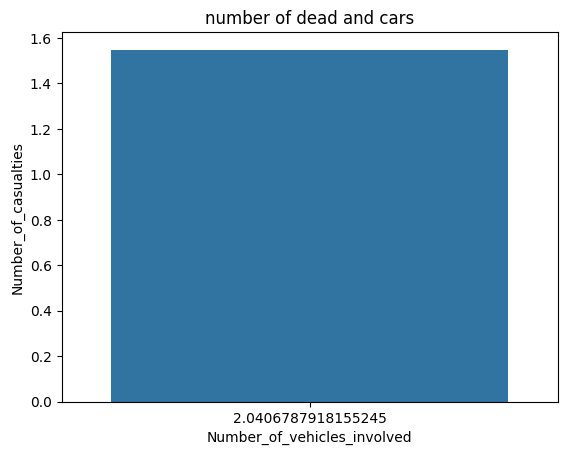

In [ ]:

sns.barplot(data=df,x='Number_of_vehicles_involved',y='Number_of_casualties')
plt.title('number of dead and cars')

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Cause_of_accident,Accident_severity,year,Month,Day,hour,minute,Second,Age_band_of_driver_encoded,Type_of_vehicle_encoded
0,2024-07-25 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Moving Backward,Slight Injury,2024,7,25,17,2,0,1.0,1.0
1,2024-07-25 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Overtaking,Slight Injury,2024,7,25,17,2,0,2.0,3.0
2,2024-07-25 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Changing lane to the left,Serious Injury,2024,7,25,17,2,0,1.0,4.0
3,2024-07-25 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Changing lane to the right,Slight Injury,2024,7,25,1,6,0,1.0,3.0
4,2024-07-25 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Overtaking,Slight Injury,2024,7,25,1,6,0,1.0,NaN


### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

<Axes: xlabel='Age_band_of_driver_encoded', ylabel='Type_of_vehicle_encoded'>

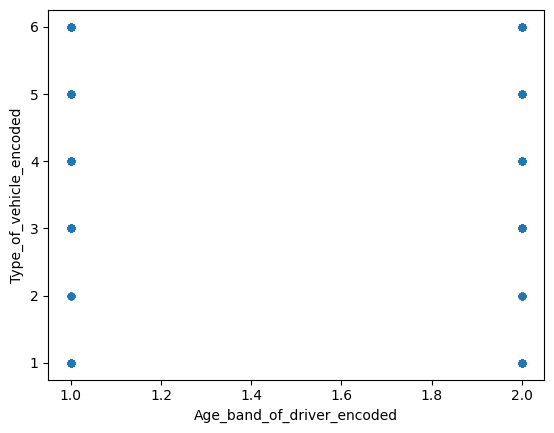

In [ ]:
df.plot.scatter(x='Age_band_of_driver_encoded',y='Type_of_vehicle_encoded')


### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


<Axes: xlabel='Number_of_vehicles_involved', ylabel='Count'>

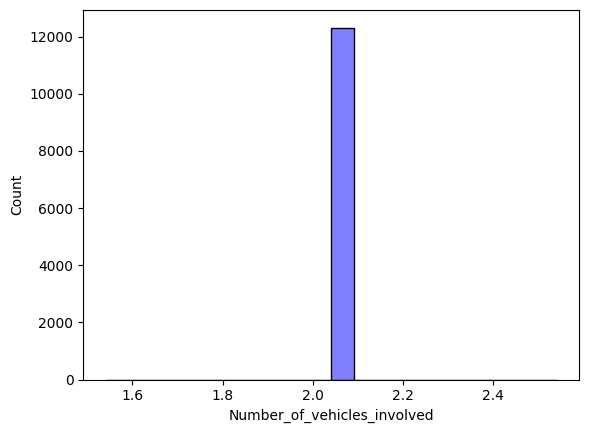

In [ ]:
sns.histplot(df['Number_of_vehicles_involved'],kde=True,bins=20,color='blue')

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

**this data have many missing data that not handle with it as i have to do but i do all my best**